# Proyecto Mineria de Datos

Load libraries for Data Preprocessing:
    

In [127]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

%matplotlib inline

Load dataset:

In [128]:
cervicalCancer = pd.read_csv("kag_risk_factors_cervical_cancer.csv")

In [129]:
cervicalCancer.drop(['STDs: Number of diagnosis', 'STDs: Time since first diagnosis', 'STDs: Time since last diagnosis'], axis=1, inplace=True)
# 'Schiller', 'Hinselmann', 'Dx', 

In [130]:
cervicalCancer

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:Hepatitis B,STDs:HPV,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.000000,0.00,0.0,0.00,0.0,...,0.0,0.0,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.000000,0.00,0.0,0.00,0.0,...,0.0,0.0,0,0,0,0,0,0,0,0
2,34,1.0,NaN,1.0,0.0,0.000000,0.00,0.0,0.00,0.0,...,0.0,0.0,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.000000,37.00,1.0,3.00,0.0,...,0.0,0.0,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.000000,0.00,1.0,15.00,0.0,...,0.0,0.0,0,0,0,0,0,0,0,0
5,42,3.0,23.0,2.0,0.0,0.000000,0.00,0.0,0.00,0.0,...,0.0,0.0,0,0,0,0,0,0,0,0
6,51,3.0,17.0,6.0,1.0,34.000000,3.40,0.0,0.00,1.0,...,0.0,0.0,0,0,0,0,1,1,0,1
7,26,1.0,26.0,3.0,0.0,0.000000,0.00,1.0,2.00,1.0,...,0.0,0.0,0,0,0,0,0,0,0,0
8,45,1.0,20.0,5.0,0.0,0.000000,0.00,0.0,0.00,0.0,...,0.0,0.0,1,0,1,1,0,0,0,0
9,44,3.0,15.0,NaN,1.0,1.266973,2.80,0.0,0.00,NaN,...,0.0,0.0,0,0,0,0,0,0,0,0


In [131]:
# cervicalCancer = cervicalCancer.fillna(cervicalCancer.mean())
# cervicalCancer.dropna(axis=0, how='any', inplace=True)

cervicalCancer.fillna(method='pad',inplace=True)
cervicalCancer.fillna(method='bfill',inplace=True)

# AQUI TENEMOS 2 OPCIONES PARA MANEJAR LOS DATOS QUE NO ESTAN DISPONIBLES. TENEMOS QUE PROBAR
# LOS 2, Y VER CUAL DA MEJORES RESULTADOS

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11c02d390>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11c69c198>]], dtype=object)

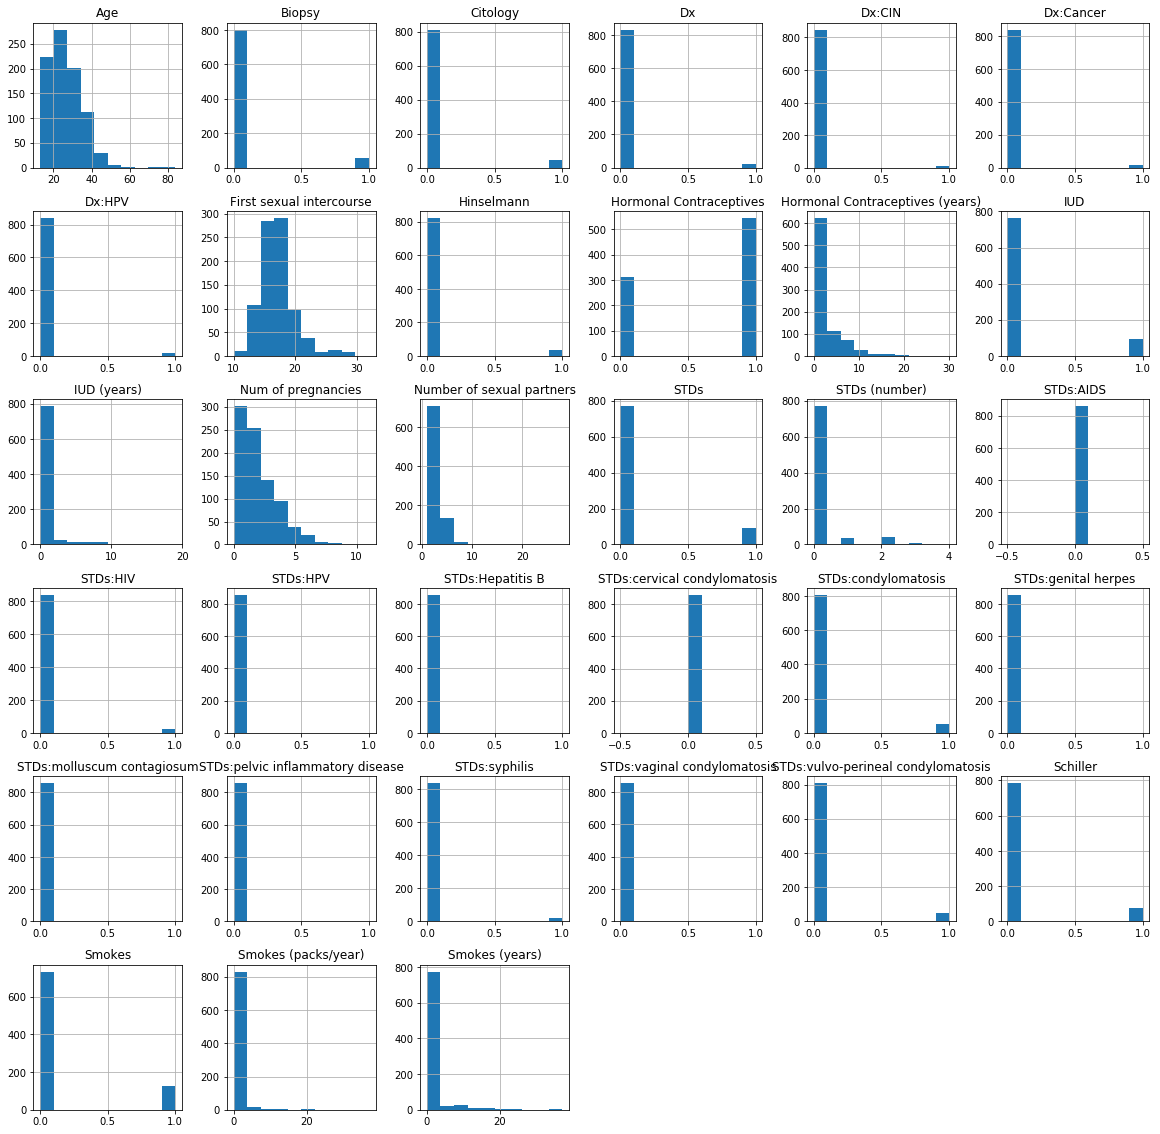

In [132]:
cervicalCancer.hist(figsize=(20,20))

Confirmemos que no tenemos valores perdidos o nulos en el dataset:

In [133]:
cervicalCancer.isnull().values.any()

False

In [134]:
X=cervicalCancer.drop('Biopsy',axis=1)
y=cervicalCancer['Biopsy']
print(X.shape)
print(y.shape)

(858, 32)
(858,)


In [135]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=1)
datasets=[X_train, X_test, y_train, y_test]
for i in datasets:
    print(i.shape)

(600, 32)
(258, 32)
(600,)
(258,)


## Aplicación de No-Supervisado al Set de Datos

### Uso de k-Means

In [136]:
from sklearn.cluster import KMeans

X_train = cervicalCancer
kmeans = KMeans(n_clusters=2)
kmeans.fit(X_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [137]:
print("Cluster memberships:\n{}".format(kmeans.labels_))

Cluster memberships:
[1 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 1
 0 0 1 0 1 1 1 0 1 0 0 1 1 1 0 1 0 0 0 1 1 1 1 1 0 1 0 1 1 1 1 0 1 1 1 1 1
 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1
 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0
 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 1 0 0 0 1 0
 0 0

In [138]:
y_train_result = kmeans.predict(X_train)
print(y_train_result)

[1 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 1
 0 0 1 0 1 1 1 0 1 0 0 1 1 1 0 1 0 0 0 1 1 1 1 1 0 1 0 1 1 1 1 0 1 1 1 1 1
 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1
 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0
 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 1 0 0 0 1 0
 0 0 1 1 1 1 0 1 1 1 1 0 

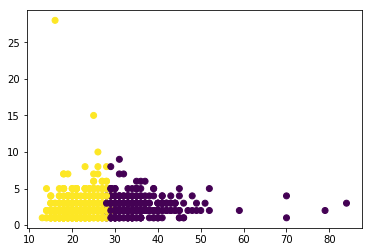

In [139]:
plt.scatter(X_train.values[:, 0], X_train.values[:, 1], c=y_train_result)

### Uso de Aglomeracion

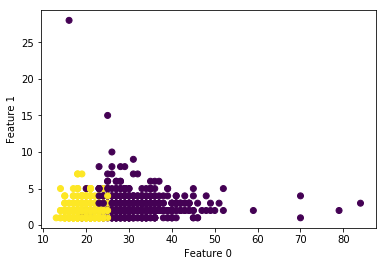

In [140]:
from sklearn.cluster import AgglomerativeClustering
agg = AgglomerativeClustering(n_clusters=2)
assignment = agg.fit_predict(X_train)
plt.scatter(X_train.values[:, 0], X_train.values[:, 1], c=assignment)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")